### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [69]:
#Read the csv file
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [49]:
#data.info()
print(f"Total rows = {data.shape[0]}")
#Get the list of dataframe's sum of null in all columns
null_list_sum = data.isnull().sum()
#print(null_list_sum)
#Lets print the column names which has null values or Nans
column_with_nulls = null_list_sum[null_list_sum > 0]
#print("------------------------------------------------------------")
#print(column_with_nulls)


print("------------------------------------------------------------")
for col in column_with_nulls.index:
    print(f"Looking for values in col : {col}")
    print(data[col].value_counts(dropna=False))
    print("\n")


Total rows = 12684
------------------------------------------------------------
Looking for values in col : car
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


Looking for values in col : Bar
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64


Looking for values in col : CoffeeHouse
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64


Looking for values in col : CarryAway
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64


Looking for values in col : RestaurantLessThan20
RestaurantLessThan20
1~3      5376


3. Decide what to do about your missing data -- drop, replace, other...

In [81]:
data = pd.read_csv('data/coupons.csv')

#major of column car is NaNs, its better to ignore Car column
data = data.drop('car', axis=1)
#print(data.columns)
null_list_sum = data.isnull().sum()
column_with_nulls = null_list_sum[null_list_sum > 0]
# Remove rows with NaN in any of the specified columns
data_cleaned = data.dropna(subset=column_with_nulls.index)

#print(data_cleaned.isnull().sum())
print(f"Rows in the original data = {data.shape[0]}")
print(f"Rows in the data-cleaned = {data_cleaned.shape[0]}")
reduction_percentage = ((data.shape[0] - data_cleaned.shape[0]) / data.shape[0]) * 100
print(f"reduction of rows after removing NaNs = {reduction_percentage:.2f}%")

#set easier name
df = data_cleaned

Rows in the original data = 12684
Rows in the data-cleaned = 12079
reduction of rows after removing NaNs = 4.77%


4. What proportion of the total observations chose to accept the coupon?


Accepted = 6877, rejected = 5202


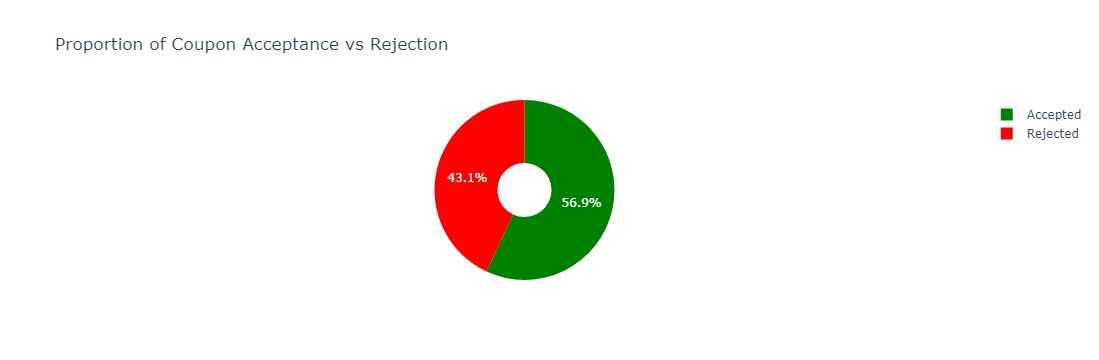

In [110]:
import plotly.express as px

#print(df.columns)
total_acceptance = (df['Y'] == 1).sum()
total_rejection = (df['Y'] == 0).sum()
print(f"Accepted = {total_acceptance}, rejected = {total_rejection}")

# Data for the pie chart
labels = ['Accepted', 'Rejected']
sizes = [total_acceptance, total_rejection]

# Create the pie chart
fig = px.pie(values=sizes, names=labels, title="Proportion of Coupon Acceptance vs Rejection", 
             hole=0.3,  # To create a donut chart (optional, use `hole=0` for regular pie)
             color_discrete_sequence=['green', 'red'])  # Optional: set color scheme

# Show the plot
fig.show()


5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

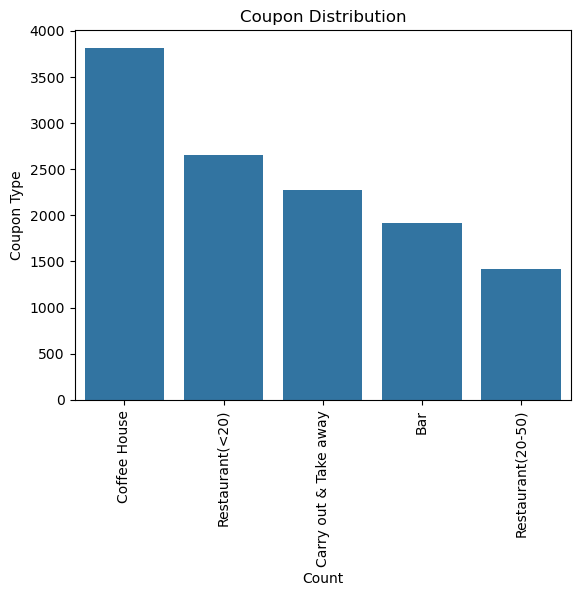

In [140]:
print(df.value_counts('coupon'))
coupon_attributes = df.value_counts('coupon')
sns.barplot(x=coupon_attributes.index, y = coupon_attributes.values)
plt.title('Coupon Distribution')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.xticks(rotation=90)

6. Use a histogram to visualize the temperature column.

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64


<Axes: xlabel='temperature', ylabel='Count'>

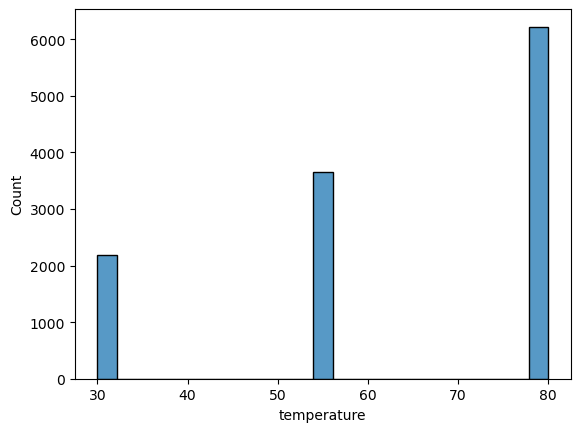

In [150]:
print(df.columns)
print(df.value_counts('temperature'))

sns.histplot(data=df, x='temperature')  # kde=True adds a kernel density estimate line

#sns.histplot(data=df, x='temperature', bins=20, kde=True, color='skyblue')  # kde=True adds a kernel density estimate line

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

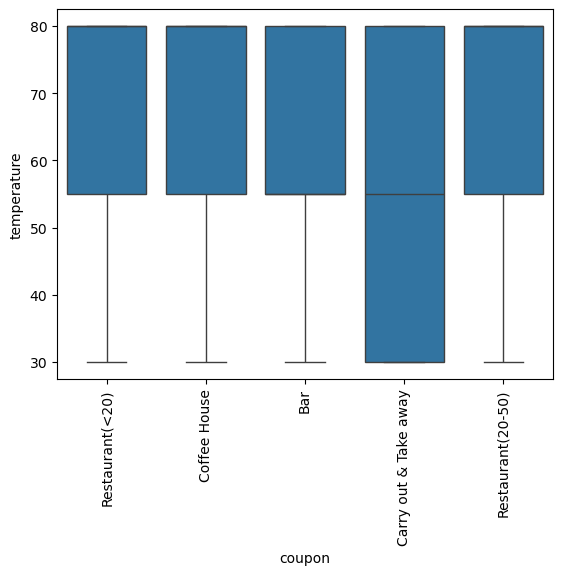

In [156]:
sns.boxplot(data=df, x='coupon', y='temperature')
plt.xticks(rotation=90)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [175]:
#print(df.columns)
df_bar_coupons = df[df['coupon'] == 'Bar']
#print(df_bar_coupons.shape[0])

1913


2. What proportion of bar coupons were accepted?


Accepted = 788, rejected = 1125


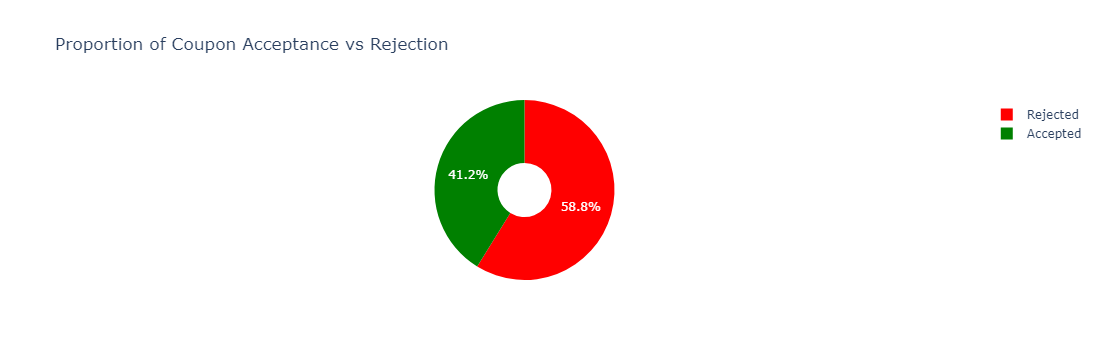

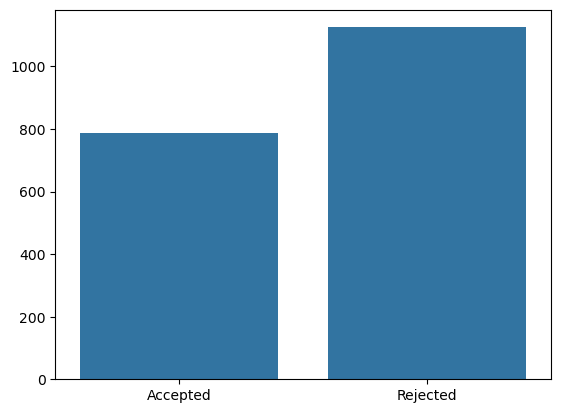

In [213]:
total_acceptance = (df_bar_coupons['Y'] == 1).sum()
total_rejection = (df_bar_coupons['Y'] == 0).sum()
print(f"Accepted = {total_acceptance}, rejected = {total_rejection}")

# Data for the pie chart
labels = ['Accepted', 'Rejected']
sizes = [total_acceptance, total_rejection]

sns.barplot(x=labels, y=sizes)

# Create the pie chart
fig = px.pie(values=sizes, names=labels, title="Proportion of Coupon Acceptance vs Rejection", 
             hole=0.3,  # To create a donut chart (optional, use `hole=0` for regular pie)
             color_discrete_sequence=['red', 'green'])  # Optional: set color scheme

# Show the plot
fig.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64


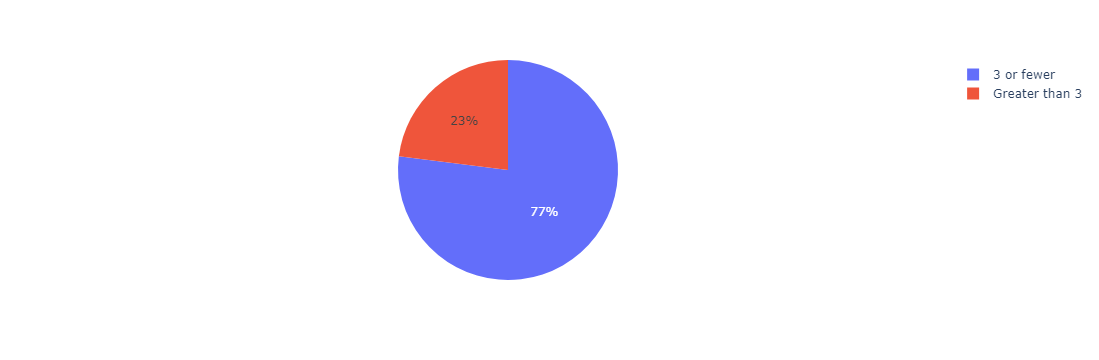

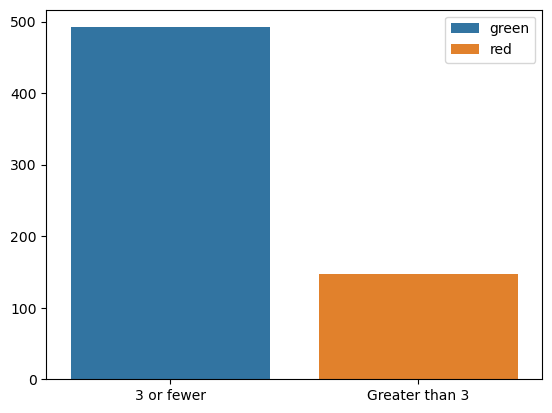

In [263]:
print(df_bar_coupons.value_counts('Bar'))
df_bar_coupons_accepted = df_bar_coupons[df_bar_coupons['Y'] == 1]  
count_3_or_fewer = (df_bar_coupons_accepted['Bar'] == '1~3').sum() + (df_bar_coupons_accepted['Bar'] == 'less1').sum()
count_4to8_gt8 = (df_bar_coupons_accepted['Bar'] == '4~8').sum() + (df_bar_coupons_accepted['Bar'] == 'gt8').sum()

x_values = ['3 or fewer', 'Greater than 3']
values = [count_3_or_fewer, count_4to8_gt8]  # Replace with your acceptance rates

sns.barplot(x=x_values, y=values, hue=['green', 'red'])


# Create the pie chart
fig = px.pie(values=values, names=x_values)

# Show the plot
fig.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: >

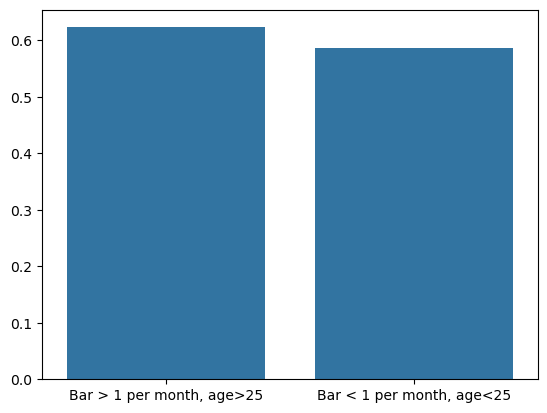

In [261]:
df_acceptance_bar_more_than_once = df[~df['Bar'].isin(['never', 'less1'])]
df_acceptance_bar_more_than_once_over_25 = df_acceptance_bar_more_than_once[~df_acceptance_bar_more_than_once['age'].isin(['below21', '21'])]

df_acceptance_bar_others = df[df['Bar'].isin(['never', 'less1'])]
df_acceptance_bar_others_age_less_then_25 = df_acceptance_bar_others[df_acceptance_bar_others['age'].isin(['below21', '21'])]

x_values = ['Bar > 1 per month, age>25', 'Bar < 1 per month, age<25']
values = [(df_acceptance_bar_more_than_once_over_25['Y'] == 1).mean(), (df_acceptance_bar_others_age_less_then_25['Y'] ==1).mean()]  # Replace with your acceptance rates

sns.barplot(x=x_values, y=values)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


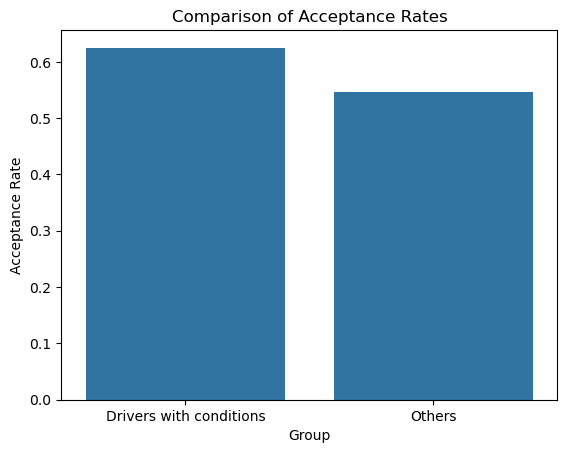

In [319]:
#print(df.columns)
#print(df.value_counts('passanger'))
#print("\n\n")
#print(df.value_counts('occupation'))

df_driver_bar_moreThanOnce_passengers_nokids = df[~df['Bar'].isin(['never', 'less1']) & ~df['passanger'].isin(['Kid(s)']) & ~df['occupation'].isin(['Farming Fishing & Forestry'])]
df_others = df[~df.index.isin(df_driver_bar_moreThanOnce_passengers_nokids.index)]

x_values = ['Drivers with conditions', 'Others']
values = [(df_driver_bar_moreThanOnce_passengers_nokids['Y'] == 1).mean(), (df_others['Y'] ==1).mean()]  # Replace with your acceptance rates

sns.barplot(x=x_values, y=values)
# Add data labels on top of the bars

# Add labels and title
plt.title('Comparison of Acceptance Rates')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



<Axes: >

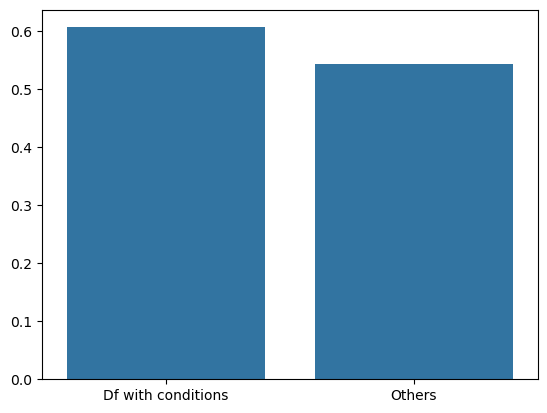

In [335]:
#print(df.columns)
#print(df.value_counts('RestaurantLessThan20'))
#print("\n")
#print(df.value_counts('income'))

#only get the conditions first
dataframe1 = ~df['Bar'].isin(['never', 'less1']) & ~df['passanger'].isin(['Kid(s)']) & ~df['maritalStatus'].isin(['Widowed'])
dataframe2 = ~df['Bar'].isin(['never', 'less1']) & df['age'].isin(['21','26','below21'])
dataframe3 = df['RestaurantLessThan20'].isin(['4~8','gt8']) & df['income'].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500'])

#ORing all the conditions
oring_dataframe = dataframe1 | dataframe2 | dataframe3
#get the dataframe with all conditions
main_dataframe = df[oring_dataframe]
df_others = df[~df.index.isin(main_dataframe.index)]

x_values = ['Df with conditions', 'Others']
values = [(main_dataframe['Y'] == 1).mean(), (df_others['Y'] ==1).mean()]  # Replace with your acceptance rates

sns.barplot(x=x_values, y=values)



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Looking at the analysis of the data, it looks like drivers are more prone to buying coupons of Coffee house and cheaper restaurants(<20). People who has no passanger kids with Single, widowed marital status are more prone to accepting bar coupons. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [337]:
print(df.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


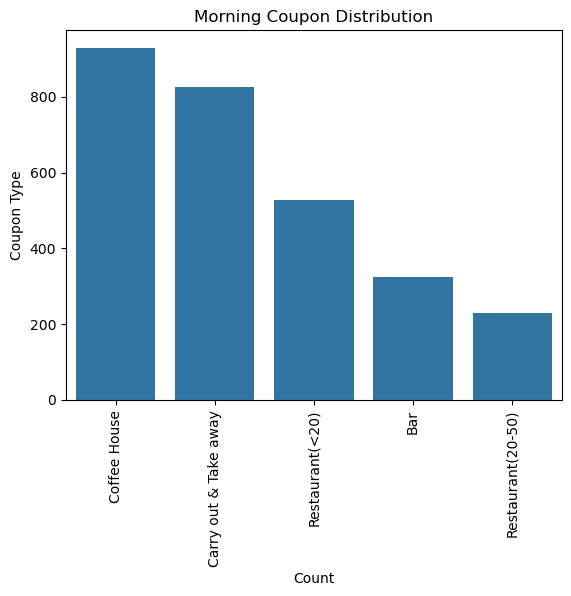

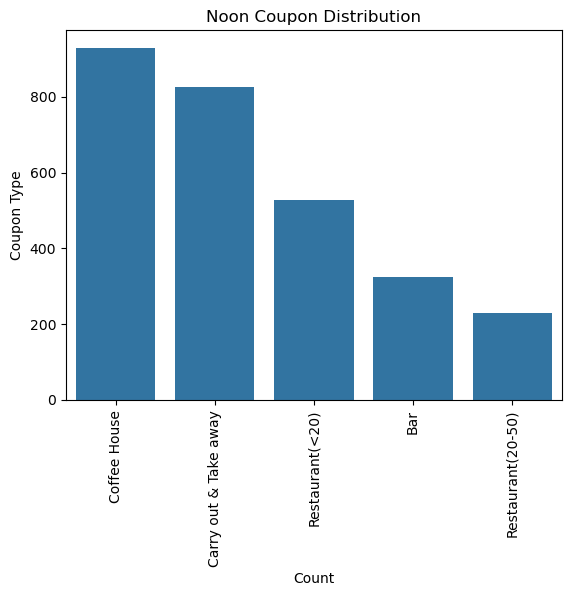

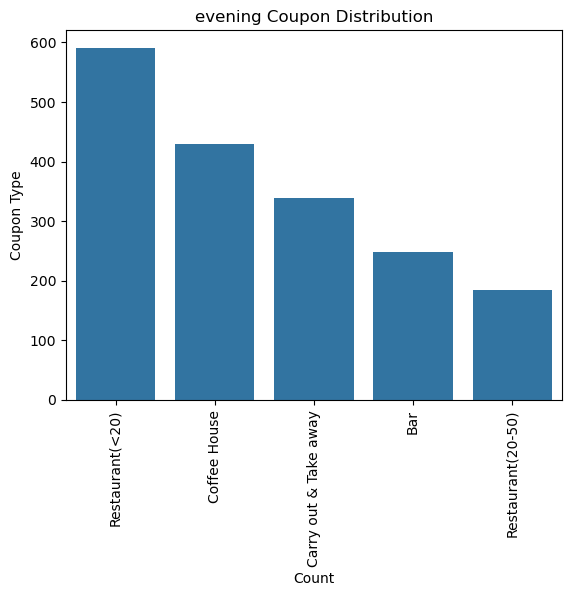

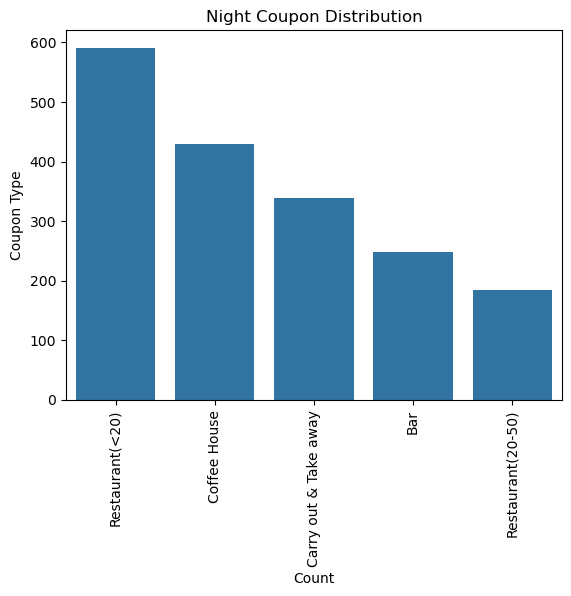

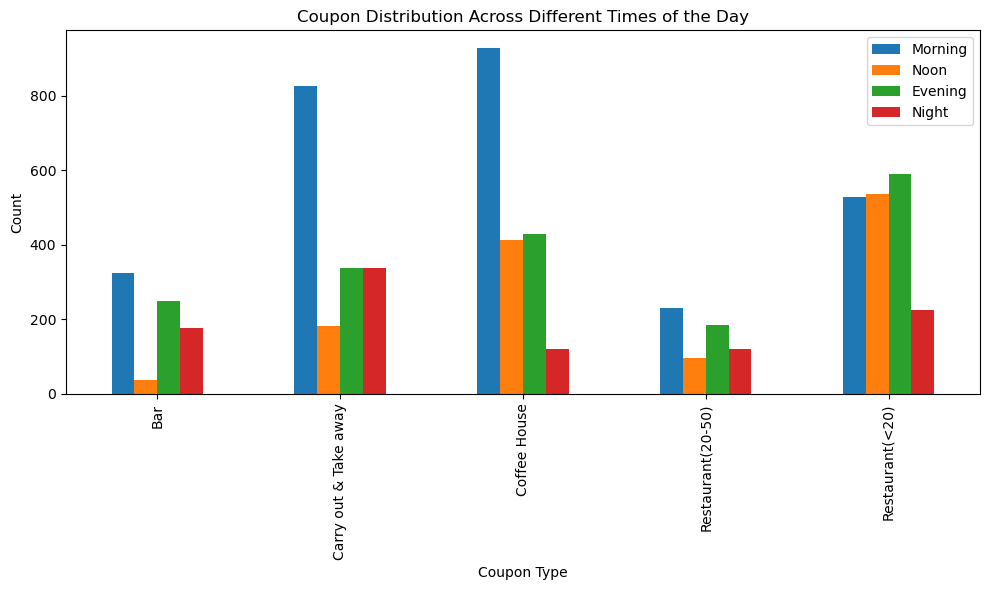

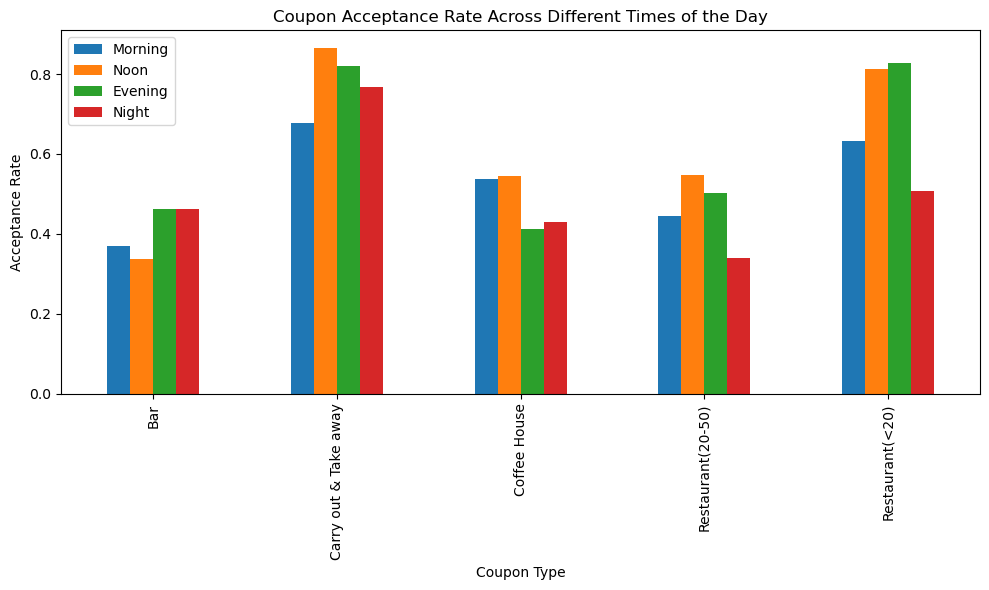

In [453]:
#Here the goal is to check the type of coupons accepted and the acceptance rate by the drivers with respect to time. 
#Looking at the results, drivers are more prone to accept coupons for Carry out, Restaurants<20 and Coffee house. The coffee house coupons are more prone to be accepted during the day.
#Also, after 6, people would be more interested in getting a Carry out coupons. 

#print(df.value_counts('time'))
#print(df.value_counts('passanger'))
#print(print(df.value_counts('temperature')))
#print(print(df.value_counts('Bar')))
#print(print(df.value_counts('coupon')))

morning_time_df = df[ ((df['time'] == '7AM') | (df['time'] == '10AM'))  & (df['Y']==1)]
coupon_attributes = morning_time_df.value_counts('coupon')
sns.barplot(x=coupon_attributes.index, y = coupon_attributes.values)
plt.title('Morning Coupon Distribution')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.xticks(rotation=90)
plt.show()

noon_time_df = df[(df['time'] == '2PM')  & (df['Y']==1)]
coupon_attributes = morning_time_df.value_counts('coupon')
sns.barplot(x=coupon_attributes.index, y = coupon_attributes.values)
plt.title('Noon Coupon Distribution')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.xticks(rotation=90)
plt.show()


evening_time_df = df[ (df['time'] == '6PM') & (df['Y']==1)]
coupon_attributes = evening_time_df.value_counts('coupon')
sns.barplot(x=coupon_attributes.index, y = coupon_attributes.values)
plt.title('evening Coupon Distribution')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.xticks(rotation=90)
plt.show()

night_time_df = df[ (df['time'] == '10PM') & (df['Y']==1)]
coupon_attributes = evening_time_df.value_counts('coupon')
sns.barplot(x=coupon_attributes.index, y = coupon_attributes.values)
plt.title('Night Coupon Distribution')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.xticks(rotation=90)
plt.show()

# Get coupon counts for each time period
morning_time_df = df[((df['time'] == '7AM') | (df['time'] == '10AM')) & (df['Y'] == 1)]
morning_coupon_attributes = morning_time_df['coupon'].value_counts()

noon_time_df = df[(df['time'] == '2PM') & (df['Y'] == 1)]
noon_coupon_attributes = noon_time_df['coupon'].value_counts()

evening_time_df = df[(df['time'] == '6PM') & (df['Y'] == 1)]
evening_coupon_attributes = evening_time_df['coupon'].value_counts()

night_time_df = df[(df['time'] == '10PM') & (df['Y'] == 1)]
night_coupon_attributes = night_time_df['coupon'].value_counts()

# Create a DataFrame to hold all the coupon counts for each time period
coupon_df = pd.DataFrame({
    'Morning': morning_coupon_attributes,
    'Noon': noon_coupon_attributes,
    'Evening': evening_coupon_attributes,
    'Night': night_coupon_attributes
}).fillna(0)  # Fill NaN with 0 for missing coupons in some time periods

# Plot grouped bar chart
coupon_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Coupon Distribution Across Different Times of the Day')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate acceptance rate (mean of Y = 1) for each coupon type during different times of the day
morning_time_df = df[((df['time'] == '7AM') | (df['time'] == '10AM'))]
morning_coupon_rate = morning_time_df.groupby('coupon')['Y'].mean()

noon_time_df = df[df['time'] == '2PM']
noon_coupon_rate = noon_time_df.groupby('coupon')['Y'].mean()

evening_time_df = df[df['time'] == '6PM']
evening_coupon_rate = evening_time_df.groupby('coupon')['Y'].mean()

night_time_df = df[df['time'] == '10PM']
night_coupon_rate = night_time_df.groupby('coupon')['Y'].mean()

# Combine the acceptance rates into a DataFrame
coupon_rate_df = pd.DataFrame({
    'Morning': morning_coupon_rate,
    'Noon': noon_coupon_rate,
    'Evening': evening_coupon_rate,
    'Night': night_coupon_rate
}).fillna(0)

# Plot grouped bar chart for acceptance rates
coupon_rate_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Coupon Acceptance Rate Across Different Times of the Day')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

maritalStatus
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64
--------------------------------------------


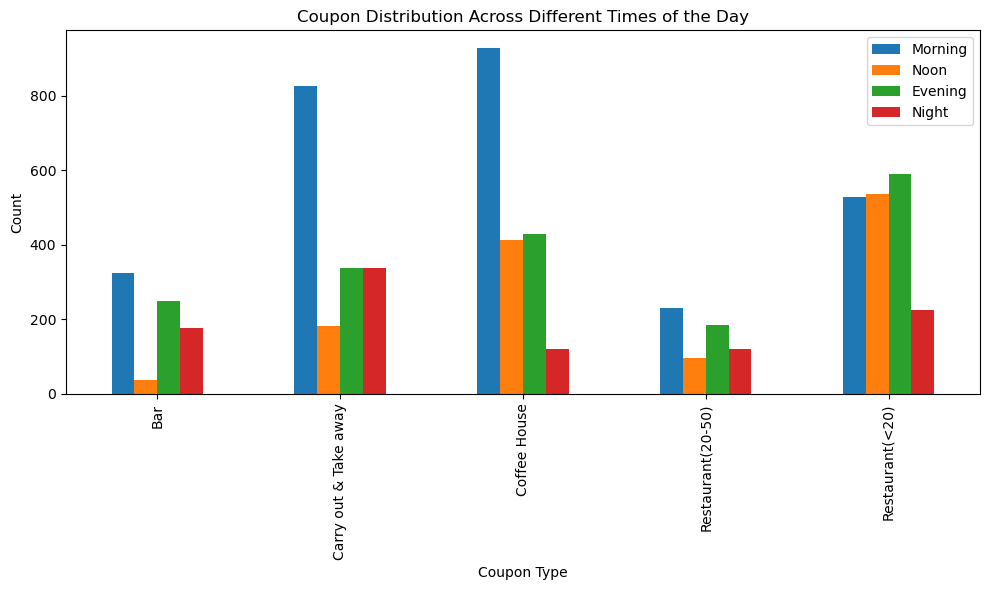

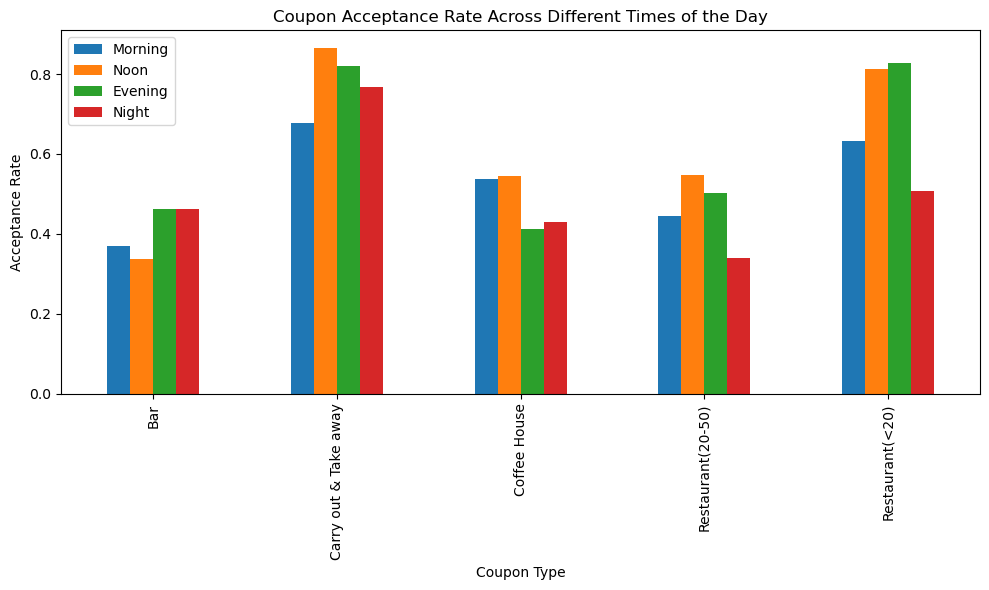

In [457]:
print(df.value_counts('maritalStatus'))
#maritalStatus
#Married partner      4831
#Single               4588
#Unmarried partner    2048
#Divorced              504
#Widowed               108
#Name: count, dtype: int64

print("--------------------------------------------")
# Get coupon counts for each time period
married_partner_df = df[((df['maritalStatus'] == 'Married partner') | (df['maritalStatus'] == 'Unmarried partner')) & (df['Y'] == 1)]
married_partner_df_coupon_attributes = married_partner_df['coupon'].value_counts()

noon_time_df = df[(df['time'] == '2PM') & (df['Y'] == 1)]
noon_coupon_attributes = noon_time_df['coupon'].value_counts()

evening_time_df = df[(df['time'] == '6PM') & (df['Y'] == 1)]
evening_coupon_attributes = evening_time_df['coupon'].value_counts()

night_time_df = df[(df['time'] == '10PM') & (df['Y'] == 1)]
night_coupon_attributes = night_time_df['coupon'].value_counts()

# Create a DataFrame to hold all the coupon counts for each time period
coupon_df = pd.DataFrame({
    'Morning': morning_coupon_attributes,
    'Noon': noon_coupon_attributes,
    'Evening': evening_coupon_attributes,
    'Night': night_coupon_attributes
}).fillna(0)  # Fill NaN with 0 for missing coupons in some time periods

# Plot grouped bar chart
coupon_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Coupon Distribution Across Different Times of the Day')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate acceptance rate (mean of Y = 1) for each coupon type during different times of the day
morning_time_df = df[((df['time'] == '7AM') | (df['time'] == '10AM'))]
morning_coupon_rate = morning_time_df.groupby('coupon')['Y'].mean()

noon_time_df = df[df['time'] == '2PM']
noon_coupon_rate = noon_time_df.groupby('coupon')['Y'].mean()

evening_time_df = df[df['time'] == '6PM']
evening_coupon_rate = evening_time_df.groupby('coupon')['Y'].mean()

night_time_df = df[df['time'] == '10PM']
night_coupon_rate = night_time_df.groupby('coupon')['Y'].mean()

# Combine the acceptance rates into a DataFrame
coupon_rate_df = pd.DataFrame({
    'Morning': morning_coupon_rate,
    'Noon': noon_coupon_rate,
    'Evening': evening_coupon_rate,
    'Night': night_coupon_rate
}).fillna(0)

# Plot grouped bar chart for acceptance rates
coupon_rate_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Coupon Acceptance Rate Across Different Times of the Day')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
print(df.value_counts('direction_same'))
print("--------------------------------------------")
print(print(df.value_counts('direction_opp')))
print("--------------------------------------------")


In [ ]:
print(print(df.value_counts('toCoupon_GEQ5min')))
print("--------------------------------------------")
print(print(df.value_counts('toCoupon_GEQ15min')))
print("--------------------------------------------")
print(print(df.value_counts('toCoupon_GEQ25min')))

In [ ]:
print(print(df.value_counts('weather')))